# 🎨 Principal Component Analysis (PCA)

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
X = data.data  # Features (13 dimensions)
y = data.target  # Target variable (wine class)
feature_names = data.feature_names

df = pd.DataFrame(X, columns=feature_names)
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the smallest number of components for 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components for 95% variance: {n_components}")

Number of components for 95% variance: 10


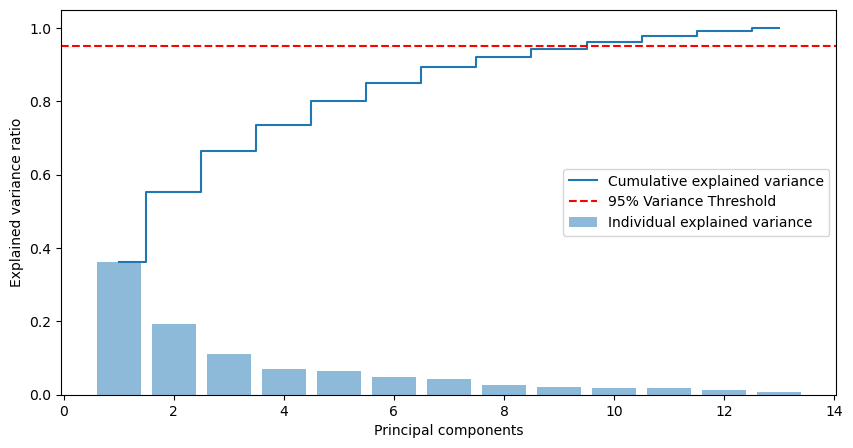

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 14), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_original = accuracy_score(y_test, y_pred)
print(f"Accuracy (Original): {accuracy_original:.4f}")

Accuracy (Original): 1.0000


In [6]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy (PCA Reduced): {accuracy_pca:.4f}")

Accuracy (PCA Reduced): 0.9444
